In [4]:
import pandas as pd
import seaborn as sns
bc = pd.read_csv('C:/Users/mille/school/year3/Data301/project-group08-project/data/processed/Bitcoin Historical Data cleaned.csv')
print('\033[1m'+'Changing names and reordering data'+'\033[0m')
bc.rename(columns={'Vol.':'Volume'}, inplace=True)
bc.rename(columns={'Date':'Date BC'}, inplace=True)
bc = bc.dropna(axis=0)
bc = bc.reindex(columns=['Date BC','Open','Close','Low','High','Volume'])
bc = bc.iloc[::-1]
bc = bc.reset_index(drop=True)
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
bc['Volume'] = bc['Volume'].apply(value_to_float)

bc

Changing names and reordering data


,Date BC,Open,Close,Low,High,Volume
0,"Aug 07, 2015",278,277.9,274.3,279.6,42810.0
1,"Aug 08, 2015",277.9,258.6,257.4,278.9,82540.0
2,"Aug 09, 2015",258.6,263.9,258.6,266.8,57480.0
3,"Aug 10, 2015",263.9,263.3,260.5,266.6,48570.0
4,"Aug 11, 2015",263.3,269,261.4,269.9,51360.0
...,...,...,...,...,...,...
2176,"Jul 22, 2021","32,131.70","32,298.90","31,729.40","32,585.40",64870.0
2177,"Jul 23, 2021","32,297.90","33,603.30","32,041.10","33,605.60",66150.0
2178,"Jul 24, 2021","33,600.50","33,824.80","33,412.90","33,955.00",67140.0
2179,"Jul 25, 2021","34,392.50","35,391.10","33,881.30","35,391.10",65100.0


In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
eth = pd.read_csv('C:/Users/mille/school/year3/Data301/project-group08-project/data/processed/etherium cleaned.csv');
print('\033[1m'+'Changing names and reordering data'+'\033[0m')
eth.rename(columns={'Date':'Date ETH'}, inplace=True)
eth = eth.dropna(axis=0)
eth = eth.reindex(columns=['Date ETH','Open','Close','Low','High','Volume'])
eth = eth.iloc[::-1]
eth = eth.reset_index(drop=True)
eth_rounded = np.round(eth, decimals = 2)
eth_rounded

Changing names and reordering data


,Date ETH,Open,Close,Low,High,Volume
0,07/08/15,2.83,2.77,2.52,3.54,1.643290e+05
1,08/08/15,2.79,0.75,0.71,2.80,6.741880e+05
2,09/08/15,0.71,0.70,0.63,0.88,5.321700e+05
3,10/08/15,0.71,0.71,0.64,0.73,4.052830e+05
4,11/08/15,0.71,1.07,0.66,1.13,1.463100e+06
...,...,...,...,...,...,...
2172,22/07/21,1994.82,2025.20,1954.30,2044.12,1.749548e+10
2173,23/07/21,2025.11,2124.78,2000.44,2129.44,1.620039e+10
2174,24/07/21,2123.96,2189.22,2107.32,2197.65,1.605745e+10
2175,25/07/21,2187.15,2191.37,2108.83,2194.44,1.456648e+10


Visualizations for both Bitcoin and Etherium

<AxesSubplot:xlabel='High', ylabel='Volume'>

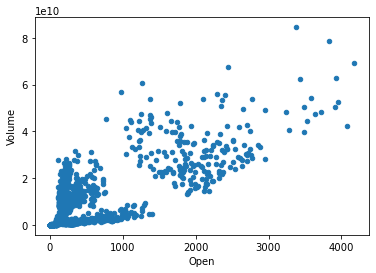

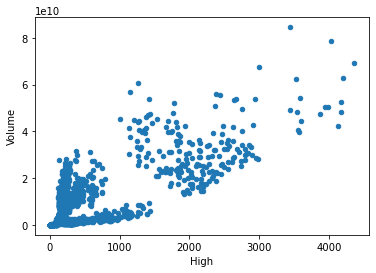

In [12]:
import seaborn as sns

eth = pd.read_csv('C:/Users/mille/school/year3/Data301/project-group08-project/data/processed/etherium cleaned.csv')
bc = pd.read_csv('C:/Users/mille/school/year3/Data301/project-group08-project/data/processed/Bitcoin Historical Data cleaned.csv')
eth.plot(kind='scatter', x='Open', y='Volume')
eth.plot(kind='scatter', x='High', y='Volume')



In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
def load_and_process(path_to_csv_file):
    
    bc = (
        pd.read_csv('C:/Users/mille/school/year3/Data301/project-group08-project/data/processed/Bitcoin Historical Data cleaned.csv')
        .rename(columns={'Close':'Close BC'})
        .rename(columns={'Open':'Open BC'})
        .rename(columns={'High':'High BC'})
        .rename(columns={'Low':'Low BC'})
        .rename(columns={'Vol.':'Vol. BC'})
    )
    bc = bc.iloc[::-1]
    bc = bc.reset_index(drop=True)
    bc = bc.dropna(axis=0)

    eth_rounded = (
        pd.read_csv('C:/Users/mille/school/year3/Data301/project-group08-project/data/processed/etherium cleaned.csv')
        .rename(columns={'Close':'Close ETH'})
        .rename(columns={'Open':'Open ETH'})
        .rename(columns={'High':'High ETH'})
        .rename(columns={'Low':'Low ETH'})
        .rename(columns={'Volume':'Vol. ETH'})
        .rename(columns={'Date':'Date ETH'})
    )
    eth_rounded = np.round(eth, decimals = 2)   
    merge = pd.concat([bc, eth_rounded], axis=1)
    merge = merge.head(2177)
    merge =merge.drop('Date ETH', axis=1)
    merge
    return merge
merge

,Date,Close BC,Open BC,High BC,Low BC,Vol. BC,Close ETH,Open ETH,High ETH,Low ETH,Vol. ETH
0,"Aug 07, 2015",277.9,278,279.6,274.3,42.81K,2.77,2.83,3.54,2.52,1.643290e+05
1,"Aug 08, 2015",258.6,277.9,278.9,257.4,82.54K,0.75,2.79,2.80,0.71,6.741880e+05
2,"Aug 09, 2015",263.9,258.6,266.8,258.6,57.48K,0.70,0.71,0.88,0.63,5.321700e+05
3,"Aug 10, 2015",263.3,263.9,266.6,260.5,48.57K,0.71,0.71,0.73,0.64,4.052830e+05
4,"Aug 11, 2015",269,263.3,269.9,261.4,51.36K,1.07,0.71,1.13,0.66,1.463100e+06
...,...,...,...,...,...,...,...,...,...,...,...
2172,"Jul 18, 2021","31,785.40","31,517.90","32,408.20","31,220.60",57.01K,2025.20,1994.82,2044.12,1954.30,1.749548e+10
2173,"Jul 19, 2021","30,837.20","31,782.90","31,887.00","30,478.20",77.48K,2124.78,2025.11,2129.44,2000.44,1.620039e+10
2174,"Jul 20, 2021","29,793.80","30,835.40","31,040.80","29,310.20",97.46K,2189.22,2123.96,2197.65,2107.32,1.605745e+10
2175,"Jul 21, 2021","32,131.40","29,794.70","32,794.60","29,519.30",118.34K,2191.37,2187.15,2194.44,2108.83,1.456648e+10


Correlation Plots between Bitcoin and Etherium

<AxesSubplot:xlabel='Vol. BC', ylabel='Vol. ETH'>

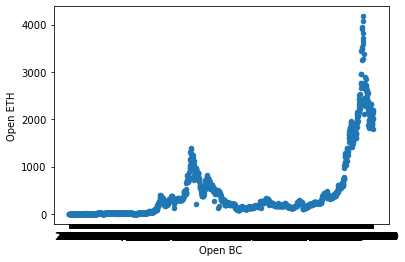

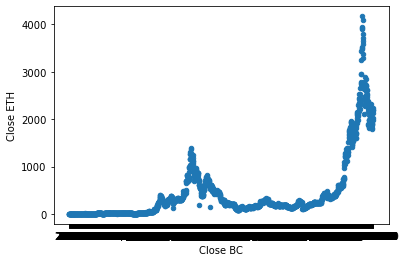

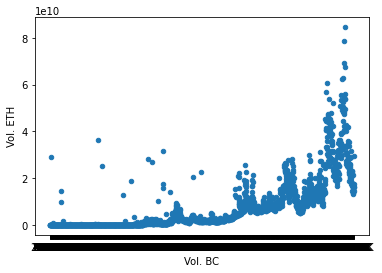

In [56]:
merge.plot(kind='scatter',x='Open BC',y='Open ETH')
merge.plot(kind='scatter',x='Close BC',y='Close ETH')
merge.plot(kind='scatter',x='Vol. BC',y='Vol. ETH')

As seen above with the three scatter plots that show correlations between etherium and bitcoin and how they affect eachother. The relationship that is shown is similar to a positive exponential growth patter. The charts show that as the opening price, the closing price, and the volume of transactions made went up for bitcoin, it represented an increase in all the same values for etherium as well.